In [1]:
import io
import random
import string
import warnings
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import warnings
warnings.filterwarnings('ignore')


import nltk
from nltk.tokenize import sent_tokenize
from nltk.corpus import words
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *


# sklearn imports
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics


# python imports
import re
import json
import os
from collections import Counter
import datetime as dt


# Visualization
from matplotlib import pyplot as plt
from matplotlib import ticker
import seaborn as sns
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from wordcloud import WordCloud
from tqdm import tqdm_notebook


# Saving models
import pickle

In [2]:
df=pd.read_csv('C:/Users/saksh/OneDrive/Desktop/Sentiment Dashboard/Analysis/2020-04-28 Coronavirus Tweets.csv')

In [3]:
df.head()

,status_id,user_id,created_at,screen_name,text,source,reply_to_status_id,reply_to_user_id,reply_to_screen_name,is_quote,...,retweet_count,country_code,place_full_name,place_type,followers_count,friends_count,account_lang,account_created_at,verified,lang
0,1254923282106798086,860252856829587457,2020-04-28T00:00:00Z,IMSS_SanLuis,"Asegura sus beneficios, registra a tus hijas e...",TweetDeck,NaN,NaN,NaN,False,...,0,NaN,NaN,NaN,1137,41,NaN,2017-05-04T22:00:38Z,False,es
1,1254923282798850049,44728980,2020-04-28T00:00:00Z,ANCALERTS,Mysterious blood clots are #COVID19's latest l...,TweetDeck,NaN,NaN,NaN,False,...,12,NaN,NaN,NaN,4926070,774,NaN,2009-06-04T21:26:24Z,True,en
2,1254923282912104448,166356616,2020-04-28T00:00:00Z,diarioelpopular,¿Quién podrá ayudarnos? 😫 Más de 200 hospitale...,TweetDeck,NaN,NaN,NaN,False,...,1,NaN,NaN,NaN,32376,116,NaN,2010-07-13T23:33:14Z,False,es
3,1254923281943031815,1042498579909107712,2020-04-28T00:00:00Z,ContraReplicaMX,"La jefa de @GobCDMX, @Claudiashein, dio a cono...",TweetDeck,NaN,NaN,NaN,False,...,0,NaN,NaN,NaN,13543,2555,NaN,2018-09-19T19:40:04Z,False,es
4,1254923284182970370,421268817,2020-04-28T00:00:00Z,ebcnarede,😷 #covid19: relatório da @fiocruz e da @FGV al...,TweetDeck,NaN,NaN,NaN,False,...,0,NaN,NaN,NaN,74628,574,NaN,2011-11-25T18:38:09Z,True,pt


In [4]:
text_en = df['text']

In [5]:
text_en_lr = text_en.apply(lambda x: re.sub(r"https\S+", "", str(x)))
text_en_lr.head()

0    Asegura sus beneficios, registra a tus hijas e...
1    Mysterious blood clots are #COVID19's latest l...
2    ¿Quién podrá ayudarnos? 😫 Más de 200 hospitale...
3    La jefa de @GobCDMX, @Claudiashein, dio a cono...
4    😷 #covid19: relatório da @fiocruz e da @FGV al...
Name: text, dtype: object

In [6]:
text_en_lr_lc = text_en_lr.apply(lambda x: x.lower())
text_en_lr_lc.head()

0    asegura sus beneficios, registra a tus hijas e...
1    mysterious blood clots are #covid19's latest l...
2    ¿quién podrá ayudarnos? 😫 más de 200 hospitale...
3    la jefa de @gobcdmx, @claudiashein, dio a cono...
4    😷 #covid19: relatório da @fiocruz e da @fgv al...
Name: text, dtype: object

In [7]:
text_en_lr_lc_pr = text_en_lr_lc.apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))
text_en_lr_lc_pr.head()

0    asegura sus beneficios registra a tus hijas e ...
1    mysterious blood clots are covid19s latest let...
2    ¿quién podrá ayudarnos 😫 más de 200 hospitales...
3    la jefa de gobcdmx claudiashein dio a conocer ...
4    😷 covid19 relatório da fiocruz e da fgv alerta...
Name: text, dtype: object

In [8]:
stop_words = set(stopwords.words('english'))
stop_words.update(['#coronavirus', '#coronavirusoutbreak', '#coronavirusPandemic', '#covid19', '#covid_19', '#epitwitter', '#ihavecorona', 'amp', 'coronavirus', 'covid19'])

text_en_lr_lc_pr_sr = text_en_lr_lc_pr.apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))
text_en_lr_lc_pr_sr.head()

0    asegura sus beneficios registra tus hijas e hi...
1    mysterious blood clots covid19s latest lethal ...
2    ¿quién podrá ayudarnos 😫 más de 200 hospitales...
3    la jefa de gobcdmx claudiashein dio conocer qu...
4    😷 relatório da fiocruz e da fgv alerta para av...
Name: text, dtype: object

In [9]:
word_list = [word for line in text_en_lr_lc_pr_sr for word in line.split()]
word_list[:5]

['asegura', 'sus', 'beneficios', 'registra', 'tus']

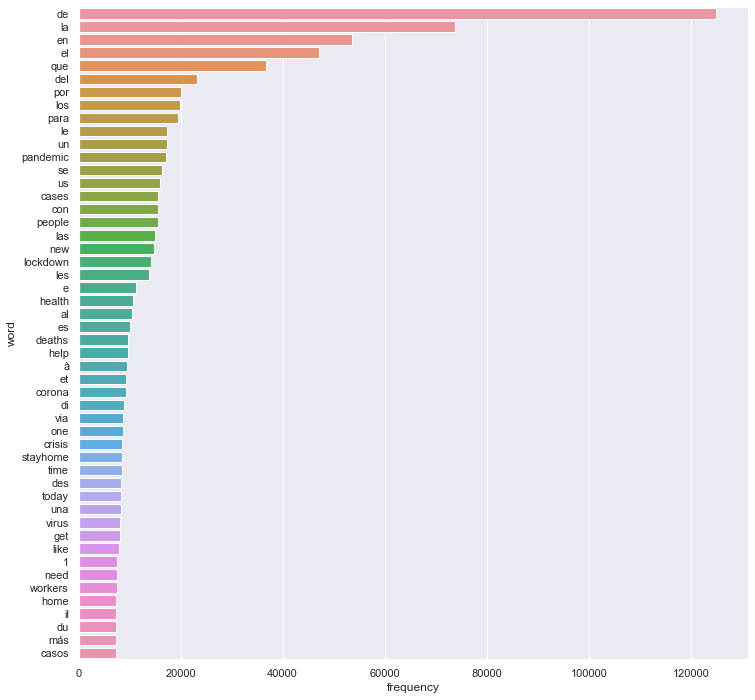

In [10]:
sns.set(style="darkgrid")
counts = Counter(word_list).most_common(50)
counts_df = pd.DataFrame(counts)
counts_df
counts_df.columns = ['word', 'frequency']

fig, ax = plt.subplots(figsize = (12, 12))
ax = sns.barplot(y="word", x='frequency', ax = ax, data=counts_df)
plt.savefig('wordcount_bar.png')

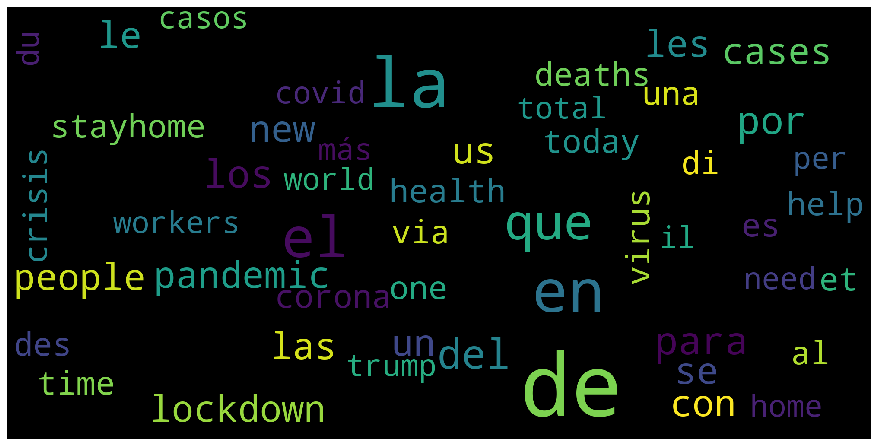

In [11]:
wordcloud = WordCloud(
    background_color='black',
    max_words=50,
    max_font_size=40, 
    scale=5,
    random_state=1,
    collocations=False,
    normalize_plurals=False
).generate(' '.join(word_list))


plt.figure(figsize = (12, 10), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.savefig('wordcloud.png')

In [12]:
sid = SentimentIntensityAnalyzer()
sentiment_scores = text_en_lr_lc_pr_sr.apply(lambda x: sid.polarity_scores(x))
sent_scores_df = pd.DataFrame(list(sentiment_scores))
sent_scores_df.tail()

,neg,neu,pos,compound
356330,0.0,0.936,0.064,0.0772
356331,0.0,1.000,0.000,0.0000
356332,0.0,1.000,0.000,0.0000
356333,0.0,1.000,0.000,0.0000
356334,0.0,1.000,0.000,0.0000


In [13]:
sent_scores_df['val'] = sent_scores_df['compound'].apply(lambda x: 'neutral' if x == 0 else ('positive' if x > 0 else 'negative'))
sent_scores_df.head()

,neg,neu,pos,compound,val
0,0.0,1.000,0.000,0.0000,neutral
1,0.0,0.741,0.259,0.2732,positive
2,0.0,1.000,0.000,0.0000,neutral
3,0.0,1.000,0.000,0.0000,neutral
4,0.0,1.000,0.000,0.0000,neutral


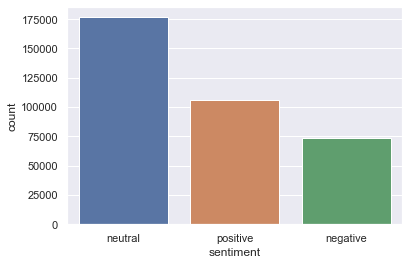

In [14]:
sent_counts = pd.DataFrame.from_dict(Counter(sent_scores_df['val']), orient = 'index').reset_index()
sent_counts.columns = ['sentiment', 'count']

sns.barplot(y="count", x='sentiment', data=sent_counts)
plt.savefig('sentiment.png')
plt.show()

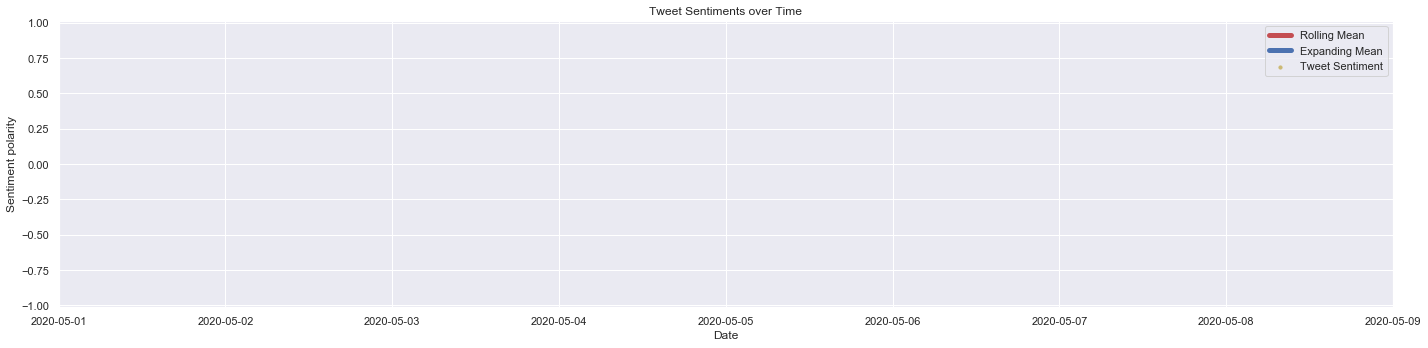

In [15]:
sentiments_time_df = pd.DataFrame()
sentiments_time_df['time'] = df['created_at']
sentiments_time_df['polarity'] = sent_scores_df['compound']
sentiments_time_df.index = pd.to_datetime(sentiments_time_df['time'])


ot = sentiments_time_df.sample(frac=.001)
ot['time'] = pd.to_datetime(ot['time'])
ot.index = pd.to_datetime(ot['time'])
ot.sort_index(inplace=True)
ot['expanding'] = ot['polarity'].expanding().mean()
ot['rolling'] = ot['polarity'].rolling('1h').mean()

fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(111)
ax.scatter(ot['time'],ot['polarity'], label='Tweet Sentiment', s = 10, color = 'y')
ax.plot(ot['time'],ot['rolling'], color ='r', label='Rolling Mean', linewidth = 5)
ax.plot(ot['time'],ot['expanding'], color='b', label='Expanding Mean', linewidth = 5)
ax.set_xlim([dt.date(2020,5,1),dt.date(2020,5,9)])
ax.set(title='Tweet Sentiments over Time', xlabel='Date', ylabel='Sentiment polarity')
ax.legend(loc='best')
fig.tight_layout()
plt.savefig('temporal_sentiments.png')
plt.show()

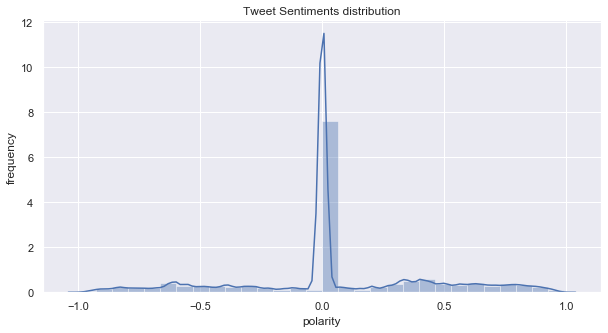

In [16]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.set(title='Tweet Sentiments distribution', xlabel='polarity', ylabel='frequency')
sns.distplot(sentiments_time_df['polarity'], bins=30, ax=ax)
# plt.show()
plt.savefig('sentiment_distribution.png')
plt.show()

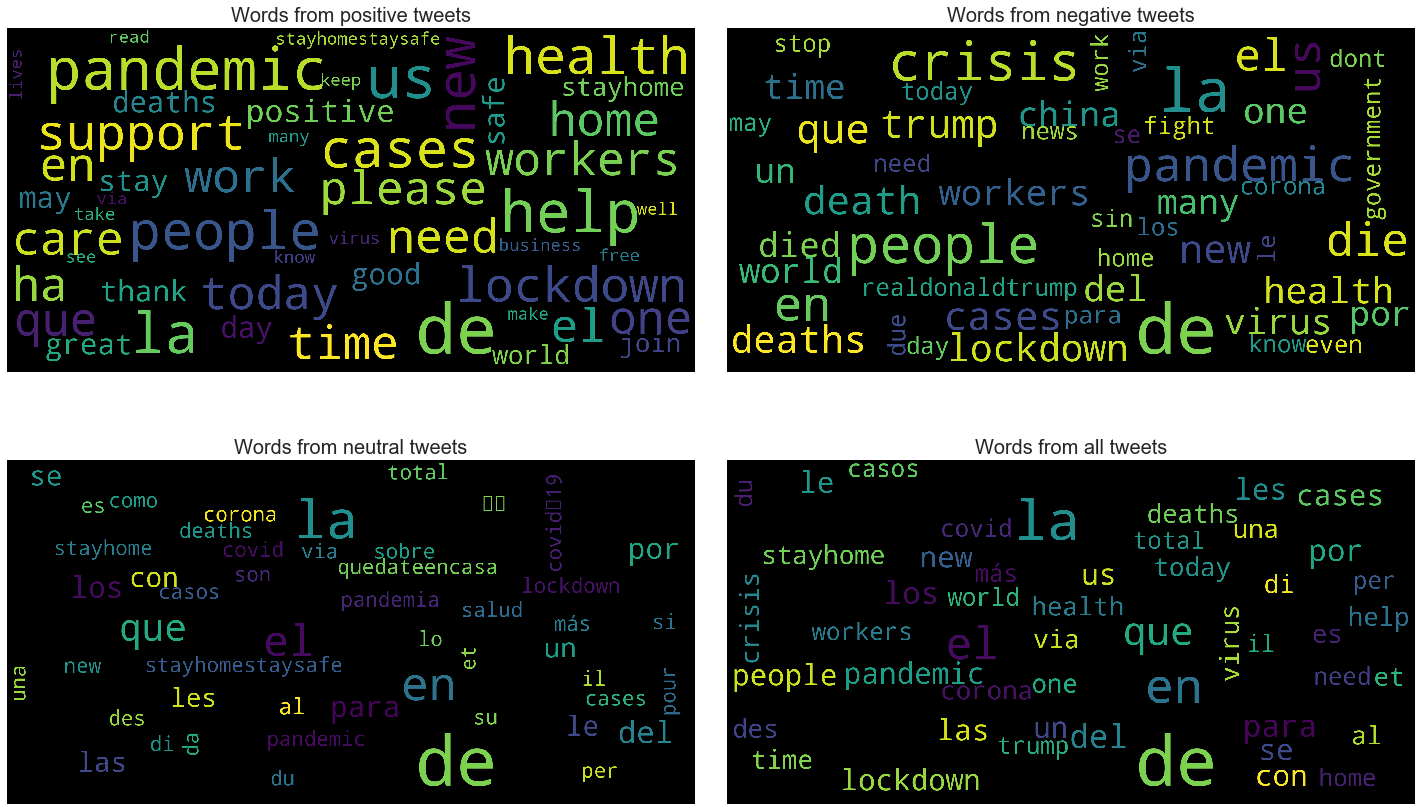

In [17]:
polar_tweets_df = pd.DataFrame()
polar_tweets_df['tweet'] = text_en_lr_lc_pr_sr
polar_tweets_df['polarity'] = sent_scores_df['val']

positive = polar_tweets_df[polar_tweets_df['polarity'] == 'positive']['tweet']
negative = polar_tweets_df[polar_tweets_df['polarity'] == 'negative']['tweet']
neutral = polar_tweets_df[polar_tweets_df['polarity'] == 'neutral']['tweet']

positive_list = [word for line in positive for word in line.split()]
negative_list = [word for line in negative for word in line.split()]
neutral_list = [word for line in neutral for word in line.split()]

positive_cloud = WordCloud(
    background_color='black',
    max_words=50,
    max_font_size=40, 
    scale=5,
    random_state=1,
    collocations=False,
    normalize_plurals=False
).generate(' '.join(positive_list))

negative_cloud = WordCloud(
    background_color='black',
    max_words=50,
    max_font_size=40, 
    scale=5,
    random_state=1,
    collocations=False,
    normalize_plurals=False
).generate(' '.join(negative_list))

neutral_cloud = WordCloud(
    background_color='black',
    max_words=50,
    max_font_size=40, 
    scale=5,
    random_state=1,
    collocations=False,
    normalize_plurals=False
).generate(' '.join(neutral_list))


fig, axs = plt.subplots(2, 2, figsize = (20, 12))
# fig.suptitle('Clouds of polar words', fontsize = 30)
fig.tight_layout(pad = 0)

axs[0, 0].imshow(positive_cloud)
axs[0, 0].set_title('Words from positive tweets', fontsize = 20)
axs[0, 0].axis('off')
# axs[0, 0].tight_layout(pad = 1)

axs[0, 1].imshow(negative_cloud)
axs[0, 1].set_title('Words from negative tweets', fontsize = 20)
axs[0, 1].axis('off')
# axs[0, 1].tight_layout(pad = 1)

axs[1, 0].imshow(neutral_cloud)
axs[1, 0].set_title('Words from neutral tweets', fontsize = 20)
axs[1, 0].axis('off')
# axs[1, 0].tight_layout(pad = 1)

axs[1, 1].imshow(wordcloud)
axs[1, 1].set_title('Words from all tweets', fontsize = 20)
axs[1, 1].axis('off')
# axs[1, 0].tight_layout(pad = 1)
plt.savefig('joint_cloud.png')
plt.show()